In [22]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

Let's try some Filtering-Based Techniques first:

In [23]:
img_dir = 'data/qsd1_w3'
img_list = []

for filename in os.listdir(img_dir):
    if filename.endswith('.jpg'):
        img = cv2.imread(os.path.join(img_dir, filename), cv2.IMREAD_COLOR)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img_list.append(img)

In [24]:
gt_dir = 'data/qsd1_w3/non_augmented'
gt_list = []

for filename in os.listdir(gt_dir):
    if filename.endswith('.jpg'):
        img = cv2.imread(os.path.join(gt_dir, filename), cv2.IMREAD_COLOR)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        gt_list.append(img)

In [25]:
idx = 5
img = img_list[6]
gt_img = gt_list[6]

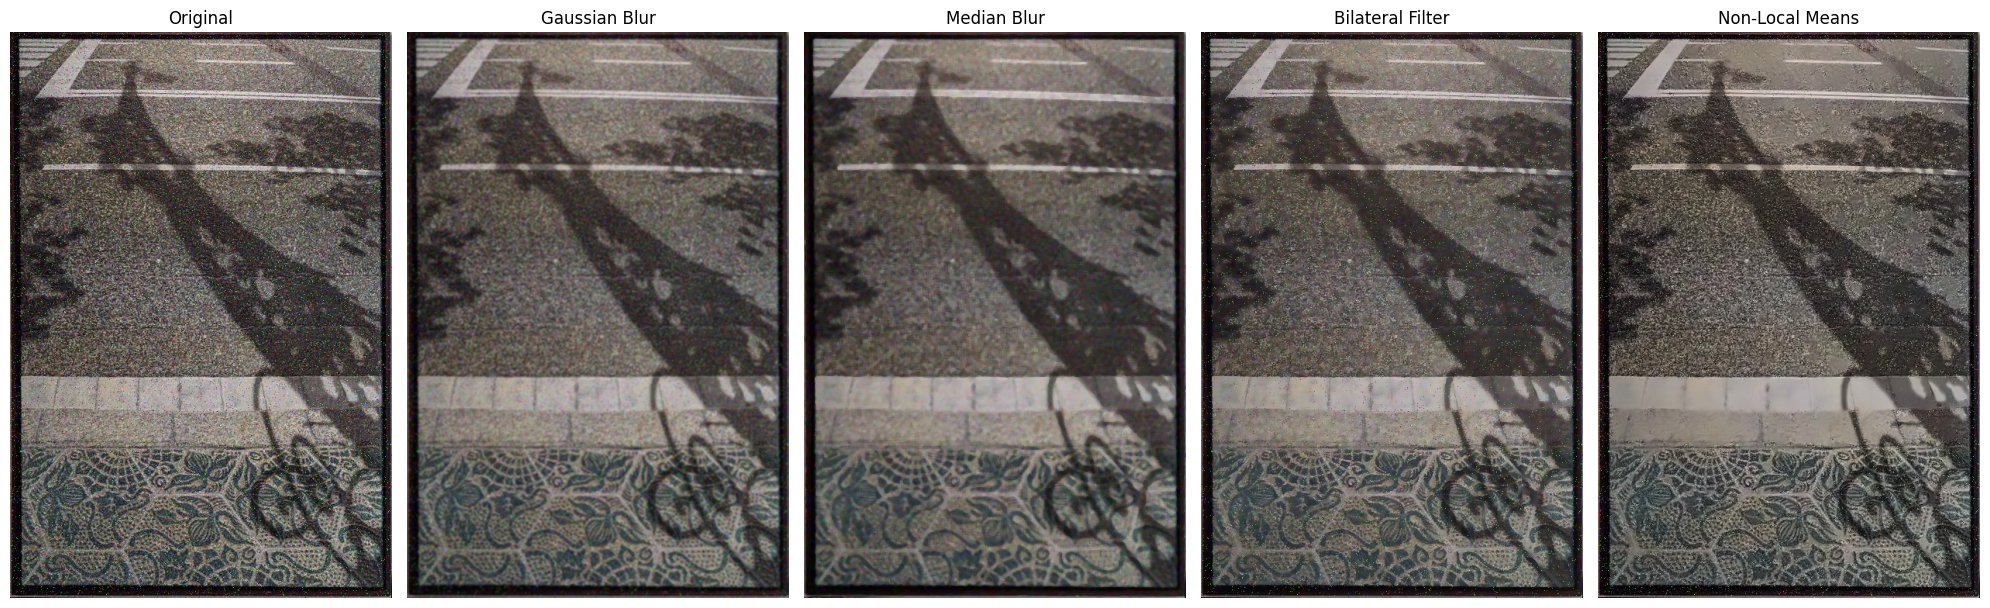

In [26]:
gb_img = cv2.GaussianBlur(img, (5, 5), 0)
mb_img = cv2.medianBlur(img, 5)
bb_img = cv2.bilateralFilter(img, 9, 75, 75)
nlm_img = cv2.fastNlMeansDenoisingColored(img, None, 10, 10, 7, 21)

# Plot the original and filtered images
plt.figure(figsize=(20, 10))

# Original Image
plt.subplot(1, 5, 1)
plt.imshow(img)
plt.title("Original")
plt.axis('off')

# Gaussian Blurred Image
plt.subplot(1, 5, 2)
plt.imshow(gb_img)
plt.title("Gaussian Blur")
plt.axis('off')

# Median Blurred Image
plt.subplot(1, 5, 3)
plt.imshow(mb_img)
plt.title("Median Blur")
plt.axis('off')

# Bilateral Filtered Image
plt.subplot(1, 5, 4)
plt.imshow(bb_img)
plt.title("Bilateral Filter")
plt.axis('off')

# Non-Local Means Denoising
plt.subplot(1, 5, 5)
plt.imshow(nlm_img)
plt.title("Non-Local Means")
plt.axis('off')

# Show the plot
plt.tight_layout()
plt.show()

In [27]:
def calculate_rmse(original_img, denoised_img):
    """
    Function to compute RMSE between the original and denoised image, per channel.
    
    Args:
    original_img: np.array, original image (RGB format).
    denoised_img: np.array, denoised image (RGB format).
    
    Returns:
    rmse_r: RMSE for the red channel.
    rmse_g: RMSE for the green channel.
    rmse_b: RMSE for the blue channel.
    overall_rmse: Average RMSE across all channels.
    """
    original_r, original_g, original_b = cv2.split(original_img)
    denoised_r, denoised_g, denoised_b = cv2.split(denoised_img)
    
    # Compute RMSE for each channel
    def rmse(channel1, channel2):
        return np.sqrt(np.mean((channel1.astype(float) - channel2.astype(float)) ** 2))
    
    rmse_r = rmse(original_r, denoised_r)
    rmse_g = rmse(original_g, denoised_g)
    rmse_b = rmse(original_b, denoised_b)

    overall_rmse = np.mean([rmse_r, rmse_g, rmse_b])
    
    return rmse_r, rmse_g, rmse_b, overall_rmse

In [28]:
rmse_dict = {'original': [], 'gb': [], 'mb': [], 'bb': [], 'nlm': []}

for img, gt_img in zip(img_list, gt_list):

    gb_img = cv2.GaussianBlur(img, (5, 5), 0)
    mb_img = cv2.medianBlur(img, 5)
    bb_img = cv2.bilateralFilter(img, 9, 75, 75)
    nlm_img = cv2.fastNlMeansDenoisingColored(img, None, 10, 10, 7, 21)

    for denoised_img, method in zip([img, gb_img, mb_img, bb_img, nlm_img], ['original', 'gb', 'mb', 'bb', 'nlm']):
        _, _, _, overall_rmse = calculate_rmse(gt_img, denoised_img)
        rmse_dict[method].append(overall_rmse)

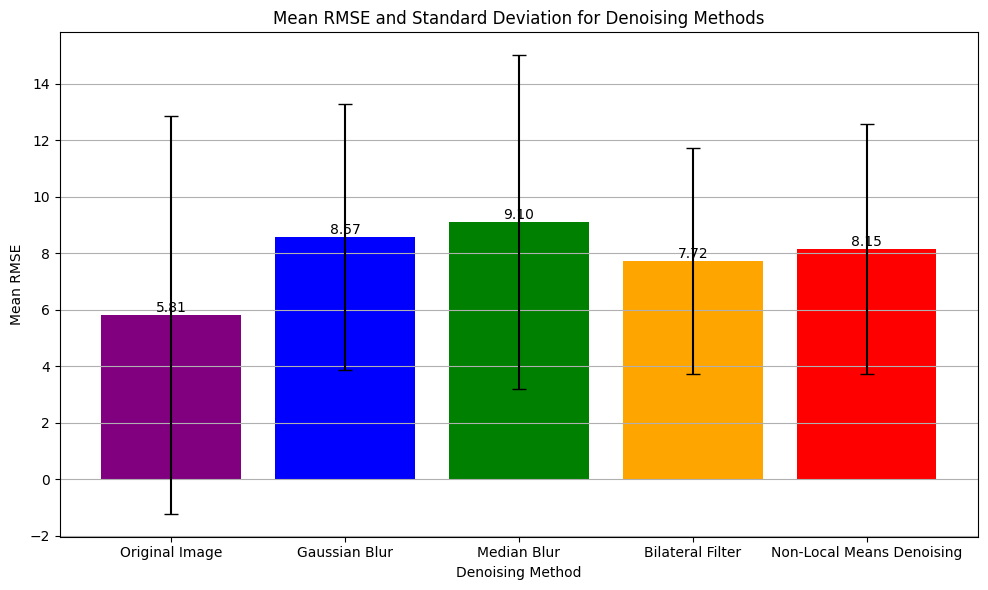

In [30]:
methods = list(rmse_dict.keys())
means = []
std_devs = []

# Calculate mean and standard deviation for each method
for method in methods:
    means.append(np.mean(rmse_dict[method]))
    std_devs.append(np.std(rmse_dict[method]))

method_names = {
    'original': 'Original Image',
    'gb': 'Gaussian Blur',
    'mb': 'Median Blur',
    'bb': 'Bilateral Filter',
    'nlm': 'Non-Local Means Denoising'
}

plt.figure(figsize=(10, 6))
bars = plt.bar(methods, means, yerr=std_devs, capsize=5, color=['purple', 'blue', 'green', 'orange', 'red'])

plt.xlabel('Denoising Method')
plt.ylabel('Mean RMSE')
plt.title('Mean RMSE and Standard Deviation for Denoising Methods')

plt.xticks(ticks=range(len(methods)), labels=[method_names[method] for method in methods])

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', ha='center', va='bottom')

plt.grid(axis='y')
plt.tight_layout()
plt.show()